
Name: Rahmani Dibansa

Date: 23rd of August 2022

Description:
    The autoencoder was discussed in lecture 4. However, the class materials provided classified it as
    Class 3. Since that is so, then, I would just add this to Class 3

Reference(s):
    ACMSIGGRAPH. SIGGRAPH Now | Hands-on Workshop: Machine Learning and Neural Networks – Lecture 4
    Retrieved from: https://www.youtube.com/watch?v=zhwQXbWANkw&list=PLUPhVMQuDB_b2kcOooEduedthcBH53mvC&index=5


In [2]:
# %tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
# TAKE THE MNIST DATASET
mnist = tf.keras.datasets.mnist # mnist data of grayscale images of handwritten digits

# LOAD THE DATA, GET THE TRAINING AND TESTING DATA
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load it into training and testing sets


# To understand what is inside the data, I will be printing it
# Please be advised that the describe function will not work on this
# Because we are using the numpy package, and not the pandas
#
# By looking at the data, we can see that it contains an array of
# numbers ranging from 0-255. It is to represent the color of the pixels
""""
print( "\n======================================================================\n" )
print( " The shape of the data: ", x_train.shape)
print(' Training Data(Features): \n', x_train)

print( "\n======================================================================\n" )
print(' Training Data(Ground Truth): \n', y_train)

print( "\n======================================================================\n" )
print(' Testing Data(Features): \n', x_test)

print( "\n======================================================================\n" )
print(' Testing Data(Ground Truth): \n', y_test)
"""

# NORMALIZE THE DATA
# To normalize the data from the image, we divide it by 255.0(the number of pixels)
x_train, x_test = x_train/255.0, x_test/255.0 # the data is in the range (0,255) grayscale value for each pixel, normalize it

In [4]:
# After normalizing the data, it range from 0 - 1.0
# Let's print it
print( "\n======================================================================\n" )
print( " TRAINING DATA (FEATURES) \n")
print( " The shape of the data: ", x_train.shape) # ( number of images, the length of x axis, the height of y axis )
print( " Max value: ", x_train.max())
print( " Min value: ", x_train.min())
print( " Argmax: ", x_train.argmax())
print( " Argmin: ", x_train.argmin())
#print('\n Training Data(Features): \n', x_train)
print( "\n======================================================================\n" )

print( "\n======================================================================\n" )
print( " TESTING DATA (FEATURES) \n")
print( " The shape of the data: ", x_test.shape) # ( number of images, the length of x axis, the height of y axis )
print( " Max value: ", x_test.max())
print( " Min value: ", x_test.min())
print( " Argmax: ", x_test.argmax())
print( " Argmin: ", x_test.argmin())
#print('\n Training Data(Features): \n', x_test)
print( "\n======================================================================\n" )



 TRAINING DATA (FEATURES) 

 The shape of the data:  (60000, 28, 28)
 Max value:  1.0
 Min value:  0.0
 Argmax:  161
 Argmin:  0




 TESTING DATA (FEATURES) 

 The shape of the data:  (10000, 28, 28)
 Max value:  1.0
 Min value:  0.0
 Argmax:  355
 Argmin:  0




In [5]:
print( "\n======================================================================\n" )
print( " TRAINING DATA (GROUND TRUTH) \n")
print( " The shape of the data: ", y_train.shape) # ( number of images, number of x pixels, number of y pixels )
print( " Max value: ", y_train.max())
print( " Min value: ", y_train.min())
print( " Argmax: ", y_train.argmax())
print( " Argmin: ", y_train.argmin())
print( " First 10 elements: ", y_train[:10])
#print('\n Training Data(Features): \n', x_train)
print( "\n======================================================================\n" )

print( "\n======================================================================\n" )
print( " TESTING DATA (GROUND TRUTH) \n")
print( " The shape of the data: ", y_test.shape) # ( number of images, number of x pixels, number of y pixels )
print( " Max value: ", y_test.max())
print( " Min value: ", y_test.min())
print( " Argmax: ", y_test.argmax())
print( " Argmin: ", y_test.argmin())
print( " First 10 elements: ", y_train[:10])
#print('\n Training Data(Features): \n', x_test)
print( "\n======================================================================\n" )

# Additional comments:
# As can be seen from displaying the information related to both data,
# The data for the features has been processed and turned into their
# corresponding value
# However, the data on the ground truth remains to be the ID of the 
# handwritten image from mnist



 TRAINING DATA (GROUND TRUTH) 

 The shape of the data:  (60000,)
 Max value:  9
 Min value:  0
 Argmax:  4
 Argmin:  1
 First 10 elements:  [5 0 4 1 9 2 1 3 1 4]




 TESTING DATA (GROUND TRUTH) 

 The shape of the data:  (10000,)
 Max value:  9
 Min value:  0
 Argmax:  7
 Argmin:  3
 First 10 elements:  [5 0 4 1 9 2 1 3 1 4]




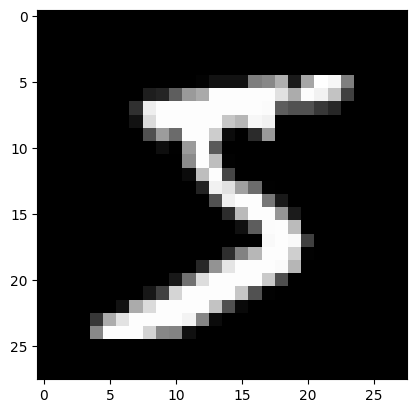

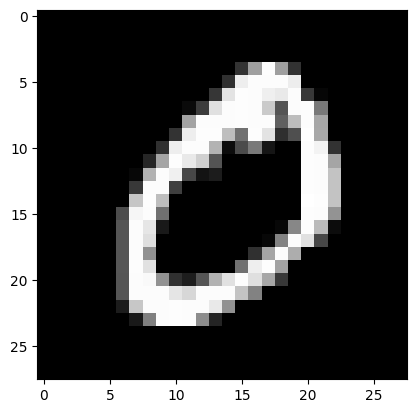

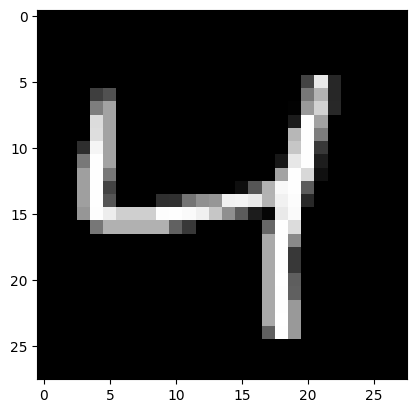

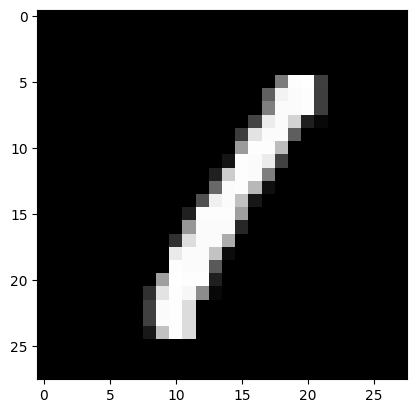

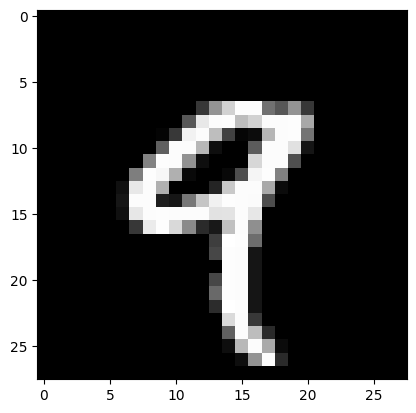

In [6]:
# plot the first 5 images
for i in range(5):
    plt.figure()
    plt.imshow(x_train[i], cmap='gray')
    # The image in array form
    # print(x_train[i])


# Additional comments regarding cmap:
#           - When img1 has shape (M,N,3) or (M,N,4), the values in img1 are interpreted as RGB 
#             or RGBA values. In this case the cmap is ignored.
#           - However, if img were an array of shape (M,N), then the cmap controls the colormap 
#             used to display the values.
# Retrieved from: https://stackoverflow.com/questions/25625952/matplotlib-what-is-the-function-of-cmap-in-imshow

# Additional comments regarding figure:
#   The figure() function in pyplot module of matplotlib library is used to create a new figure.
# Retrieved from: https://www.geeksforgeeks.org/matplotlib-pyplot-figure-in-python/#:~:text=The%20figure()%20function%20in,to%20create%20a%20new%20figure.


In [7]:
#---------------------------------------------------
# build an autoencoder model
def create_modelAE():
    # build a sequential AutoEncoder model
    model = tf.keras.models.Sequential([
        # the input layer                               
        tf.keras.layers.InputLayer((28,28)),
        # flatten it into a single column
        tf.keras.layers.Flatten(), 
        # bottleneck layer
        tf.keras.layers.Dense(32, activation='relu'),
        # the output layer
        tf.keras.layers.Dense(28*28, activation='sigmoid'),
        # the output layer, reshape the flattened column into an image shape
	      tf.keras.layers.Reshape((28, 28, 1))
	  ])
    return model



# Additional Comments:
#           - Each image contains 28*28 pixels
#             and each pixel is considered a feature.
#
#           - To do that, we have to flatten the data for each image.
#
#           - After flattening, it will have a shape of 784
#
#           - These 784 features will be used to create weights that
#             will connect with the 32 nodes on the dense_2 layer
#
#           - The number of parameters on dense to comes from "(numberOfInputFeatures*numberOfNodes) + 32"
#             I suppose that the 32 added in was the number of nodes in the layer. I think this was
#             mentioned in the previous topic. I just don't know if what I remember is right
#           Edit: I was wrong in this assumption... I searched the internet and found the proper formula
#                 the formula goes like this "(numberOfInputChannels + 1) * 32"
#           Retrieved from: https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca


In [8]:
# use the create_modelAE function to create a function
modelAE = create_modelAE()

# Display the summary
print(modelAE.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
500*500*3*32 + 32

# In the video, the curse of dimensionality was discussed. 
# Basically, this means that the larger the data, the more resources are needed
# to operate it. As such, our goal is to manage the complexity

24000032

In [9]:
model = modelAE

In [10]:
# compile, using the adamax optimizer for gradient descend and mean square error for loss
# The adamax optimizer follows the adamax algorithm
# This is an extension of adam. And is used to have an optimized gradient descent
model.compile(optimizer='adamax', loss='mse')


# Additional comments:
#       - I want to know more about optimizers, how should I choose an optimizer?

In [11]:
# fit (train) the model on the test data. The input and the output is the same because
# we are trying to re-construct the original input after compression
train_hist = model.fit(x_train, x_train, epochs=10)                        

Epoch 1/10
1875/1875 [==============================] - 17s 6ms/step - loss: 0.0475
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0226
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0159
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0131
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0118
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0112
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0109
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0107
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0105
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0104


In [13]:
#---------------------------------------------------
# plots n images in two rows, the first row is the original images
# and the second row is the reconstructed (decoded) images
def show_results(n):
    # plot
    plt.figure(figsize=(12, 12))
    for i in range(n):
        # display original image
        ax = plt.subplot(3, n, i + 1)
        ax.set_title("Original")
        plt.imshow(original[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(3, n, i + 1 + n)
        ax.set_title("Decoded")
        plt.imshow(decoded[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


In [14]:
original = []
decoded = []
n=0
# predict the first 10 items from the test set
for img in x_test[:10]:
    #predict
    # the img is in array form
    # print(img)
    pimg = model.predict(tf.expand_dims(img, 0))
    print( pimg )
    original.append(img) # original
    decoded.append(pimg.squeeze()) # predicted
    n += 1


# Additional Comments:
#       - Here we will use the model that we have trained to predict

1/1 [==============================] - 1s 767ms/step
[[[[3.22723253e-08]
   [6.37238713e-07]
   [1.55451445e-07]
   [1.83595716e-07]
   [2.77249825e-07]
   [4.51559345e-07]
   [6.25919597e-07]
   [2.97237950e-08]
   [1.01953660e-07]
   [1.45524709e-07]
   [3.49888047e-08]
   [1.77690117e-06]
   [9.94616869e-08]
   [1.46028384e-07]
   [1.08025610e-07]
   [4.74890705e-08]
   [2.51265675e-08]
   [3.80565659e-08]
   [6.08707253e-08]
   [1.95314570e-07]
   [8.67779022e-07]
   [1.36056968e-07]
   [4.16674553e-08]
   [3.50178226e-07]
   [2.77764570e-07]
   [4.00138845e-07]
   [1.50055257e-07]
   [1.76294043e-06]]

  [[5.37332880e-07]
   [1.79410584e-08]
   [1.04781890e-08]
   [3.15453086e-08]
   [4.74625836e-07]
   [8.97010040e-08]
   [4.16205914e-08]
   [1.31124764e-07]
   [7.09628551e-08]
   [2.22647756e-07]
   [4.06860096e-07]
   [3.26562315e-07]
   [1.60328042e-07]
   [7.38626369e-08]
   [2.10529635e-07]
   [1.58132281e-07]
   [1.15210059e-06]
   [2.04223269e-07]
   [2.57699952e-07]
   [6

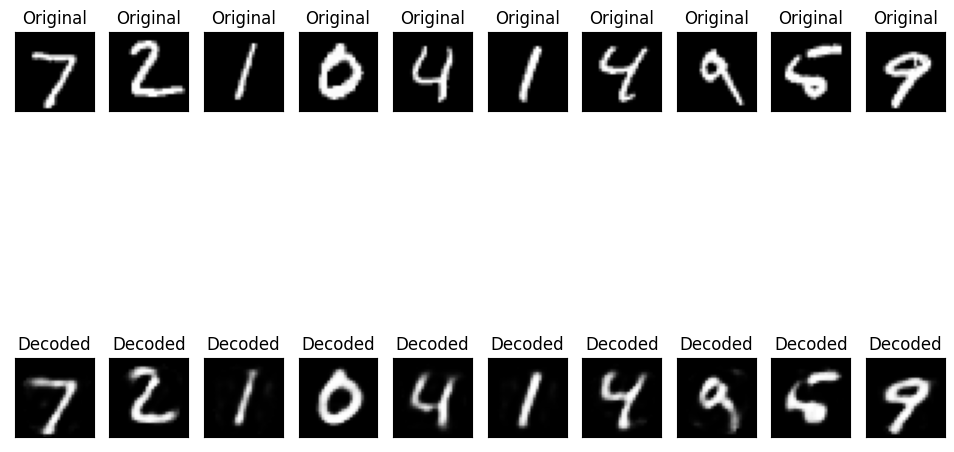

In [65]:
# use the show results function
show_results(n)


# Additional comments:
#       - On top, the data from the original list are plotted
#       - While on the bottom, the data for the prediction is shown
#       - As we can see, although the decoded image is not entirely
#         accurate. But, the output is still very similar

In [ ]:

28*28/32